# Final Project

## Best Neighborhood in Pittsburgh PA

**Our Metric for determining the best neighborhood is walkability**

**First lets import all the nessesary tools**

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import fpsnippets

**First Dataset (Misael)**

##### Lets import all the data that contains information on locations of convenience Store/Super Market

In [2]:
df = pd.read_csv("data-conveniencesupermarkets.csv")
df.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store


##### Now lets use the the coordinates given to use to locate which neighborhood the stores are located in.

In [3]:
for id, row in df.iterrows():
        df.loc[id, "Neighborhood"] = fpsnippets.geo_to_neighborhood(row[8],row[9])
df.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category,Neighborhood
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store,NaN
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store,NaN
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store,NaN
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store,NaN
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store,NaN


##### We have indicated the neighborhood that each store is located in. But some stores neighborhood could not be located so we will drop them from the list.

In [4]:
df.dropna(axis=0, subset=['Neighborhood'])

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category,Neighborhood
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store,Lincoln Place
14,200912080002,7 Eleven #36143A,NaN,11/17/2009,601,Penn Av,PA,15222.0,40.442813,-80.001884,8.0,Convenience Store,Central Business District
19,201209070008,American Natural,Desdemona Holdings LP,8/23/2012,73,Carson St,PA,15219.0,40.430917,-80.001402,8.0,Convenience Store,South Shore
22,200809180008,Bett's Market,NaN,9/8/2008,819,Brushton Ave,PA,15208.0,40.455264,-79.888216,8.0,Convenience Store,Homewood South
29,37867,Co Go's #805,Co Go's,5/17/1984,4071,Beechwood Blvd,PA,15217.0,40.427102,-79.938593,8.0,Convenience Store,Greenfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,34765,Gorkhali Store,NaN,5/19/2014,2116,Brownsville Rd,PA,15210.0,40.392709,-79.987056,9.0,Supermarket,Carrick
660,30265,Subha Laxmi Grocery,NaN,5/21/2014,2950,Brownsville Rd,PA,15227.0,40.381398,-79.976585,9.0,Supermarket,Carrick
666,201110130006,Aldi #79,Aldi Inc,10/23/2012,2628,Carson St,PA,15203.0,40.426914,-79.967530,9.0,Supermarket,South Side Flats
667,201210250002,Aldi #80,Aldi Inc,5/8/2013,5631,Baum Blvd,PA,15213.0,40.458291,-79.935066,9.0,Supermarket,Friendship


##### That looks much better!!!

##### Now lets plot the locations to figure out which neighborhood has the most convenience Store/Super Market

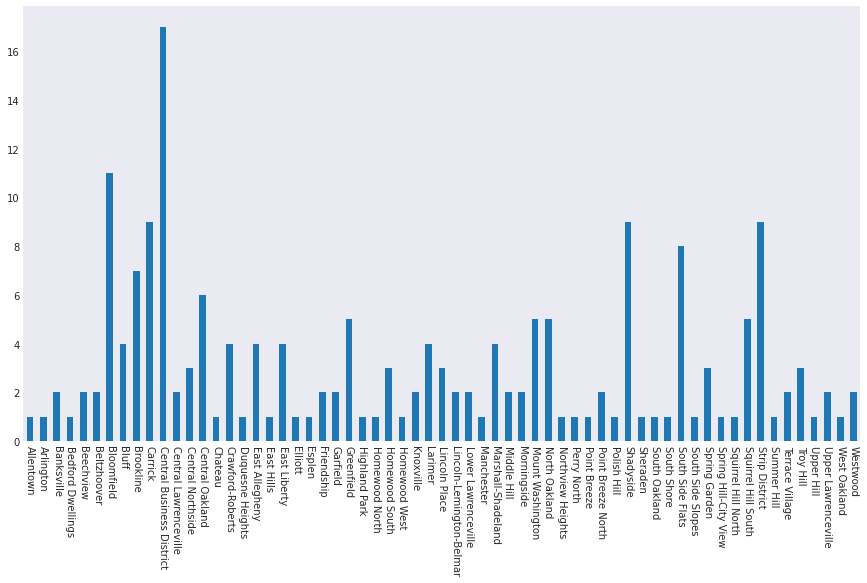

In [7]:
plt.style.use('seaborn-dark')
df["Neighborhood"].value_counts().sort_index().plot(kind='bar', rot=-90,figsize=(15, 8))

##### Now lets rank the Neighborhoods by amount of store, Since there are many Neighborhoods lets Normalize the data to give us a more accurate rating.

In [8]:
neighborhood_counts = df["Neighborhood"].value_counts()

min_count = neighborhood_counts.min()
max_count = neighborhood_counts.max()

rating_range = 10 - 1
normalize_count = (neighborhood_counts - min_count) / (max_count - min_count) * rating_range + 1

neighborhood_ratings = normalize_count.to_dict()
df['Rating'] = df['Neighborhood'].map(neighborhood_ratings)
df.dropna(axis=0, subset=['Rating'])

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category,Neighborhood,Rating
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store,Lincoln Place,2.1250
14,200912080002,7 Eleven #36143A,NaN,11/17/2009,601,Penn Av,PA,15222.0,40.442813,-80.001884,8.0,Convenience Store,Central Business District,10.0000
19,201209070008,American Natural,Desdemona Holdings LP,8/23/2012,73,Carson St,PA,15219.0,40.430917,-80.001402,8.0,Convenience Store,South Shore,1.0000
22,200809180008,Bett's Market,NaN,9/8/2008,819,Brushton Ave,PA,15208.0,40.455264,-79.888216,8.0,Convenience Store,Homewood South,2.1250
29,37867,Co Go's #805,Co Go's,5/17/1984,4071,Beechwood Blvd,PA,15217.0,40.427102,-79.938593,8.0,Convenience Store,Greenfield,3.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,34765,Gorkhali Store,NaN,5/19/2014,2116,Brownsville Rd,PA,15210.0,40.392709,-79.987056,9.0,Supermarket,Carrick,5.5000
660,30265,Subha Laxmi Grocery,NaN,5/21/2014,2950,Brownsville Rd,PA,15227.0,40.381398,-79.976585,9.0,Supermarket,Carrick,5.5000
666,201110130006,Aldi #79,Aldi Inc,10/23/2012,2628,Carson St,PA,15203.0,40.426914,-79.967530,9.0,Supermarket,South Side Flats,4.9375
667,201210250002,Aldi #80,Aldi Inc,5/8/2013,5631,Baum Blvd,PA,15213.0,40.458291,-79.935066,9.0,Supermarket,Friendship,1.5625


##### Now lets filter out any repeating neighborhoods.

In [9]:
df_filtered = df.drop_duplicates(subset='Neighborhood')
df_filtered = df_filtered.dropna(axis=0, subset=['Rating']).head(30)
print(df_filtered[['Neighborhood', 'Rating']].sort_values(by='Rating', ascending=False).head(64))

                  Neighborhood   Rating
14   Central Business District  10.0000
167                 Bloomfield   6.6250
169                    Carrick   5.5000
38                   Shadyside   5.5000
71              Strip District   5.5000
75            South Side Flats   4.9375
93                   Brookline   4.3750
112            Central Oakland   3.8125
29                  Greenfield   3.2500
125              North Oakland   3.2500
62         Squirrel Hill South   3.2500
139           Crawford-Roberts   2.6875
90                   Troy Hill   2.1250
140          Central Northside   2.1250
7                Lincoln Place   2.1250
68               Spring Garden   2.1250
22              Homewood South   2.1250
82                    Garfield   1.5625
114        Upper Lawrenceville   1.5625
61             Terrace Village   1.5625
147                Morningside   1.5625
151                Middle Hill   1.5625
174                 Banksville   1.5625
128                    Chateau   1.0000


### YAAAAAAAAAAAAA!!!!!!!!!!

#### Now we are done!!!!!!

### Misael's Conclusion:

After finding the ratings for each of the neighborhoods in Pittsburgh, we can conclude that Central Business District(Downtown I think) has the most conveince store/ Supermarkets. Threfore if you are walking about and need to buy groceries or something quick to eat you'll have the best luck of finding something within walking distance in Central Business District.

### Second data set (Dominic Servello)

In [39]:
import numpy as np
import pandas as pd
import shapely 
import matplotlib as mpl
import matplotlib.pyplot as plt
import fpsnippets
import seaborn as sns
import geopandas as gpd

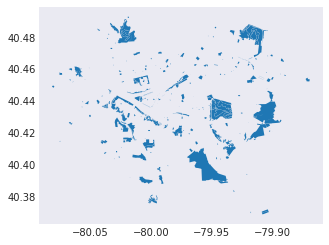

In [40]:
parks = gpd.read_file("parks/PGHWebParks.shp")
parks.plot()

In [41]:
parkz = pd.read_csv("parks/parks.csv")
num_parks = parkz.groupby("sector").sum()["acreage"]
num_parks.head()
num_parks.sort_values(ascending=False)

sector
10.0    1079.722325
8.0      662.504800
12.0     421.592659
6.0      349.570826
5.0      319.957029
2.0      311.913053
9.0      165.063443
4.0      118.353087
7.0      102.364840
3.0       75.968822
15.0      73.774938
13.0      72.403109
16.0      57.767179
11.0      39.536096
1.0       31.928987
14.0       6.541371
Name: acreage, dtype: float64

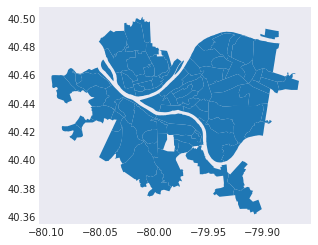

In [42]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

In [43]:
parks["center"] = parks["geometry"].centroid
parks["lat"] = parks["center"].x
parks["long"] = parks["center"].y
parks.head()

<ipython-input-43-89d1a44c3a13>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks["center"] = parks["geometry"].centroid


,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,last_edi_1,maintenanc,dpw_ac,GlobalID_1,Shape__Are,Shape__Len,geometry,center,lat,long
0,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,2023-08-02,Parks - Schenley,0.959034302188266,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012,"POLYGON ((-79.98614 40.44665, -79.98613 40.446...",POINT (-79.98570 40.44658),-79.985699,40.446583
1,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,2023-08-02,Parks - Riverview,2.06011722852731,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181,"POLYGON ((-80.03313 40.47289, -80.03314 40.473...",POINT (-80.03249 40.47296),-80.032487,40.472955
2,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,2023-08-02,Parks - Frick,0.468682427403543,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235,"POLYGON ((-79.92039 40.39402, -79.92047 40.393...",POINT (-79.92074 40.39394),-79.920739,40.393940
3,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,2023-08-02,Parks - Highland,1.95542981911229,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871,"POLYGON ((-79.94539 40.46264, -79.94486 40.462...",POINT (-79.94616 40.46257),-79.946165,40.462570
4,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,2023-08-02,Parks - Highland,5.10806964711613,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997,"POLYGON ((-79.92675 40.47832, -79.92722 40.477...",POINT (-79.92767 40.47768),-79.927670,40.477683


In [44]:
def getNeighborhood():
    for id, row in parks.iterrows():
        print(fpsnippets.geo_to_neighborhood(row[-1],row[-2]))

#getNeighborhood()

def addNeighborhood():
    for id, row in parks.iterrows():
        parks.loc[id, "neighborhood"] = (fpsnippets.geo_to_neighborhood(row[-1],row[-2]))
addNeighborhood()

parks.head(10)

,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,maintenanc,dpw_ac,GlobalID_1,Shape__Are,Shape__Len,geometry,center,lat,long,neighborhood
0,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,Parks - Schenley,0.959034302188266,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012,"POLYGON ((-79.98614 40.44665, -79.98613 40.446...",POINT (-79.98570 40.44658),-79.985699,40.446583,Crawford-Roberts
1,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,Parks - Riverview,2.06011722852731,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181,"POLYGON ((-80.03313 40.47289, -80.03314 40.473...",POINT (-80.03249 40.47296),-80.032487,40.472955,Marshall-Shadeland
2,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,Parks - Frick,0.468682427403543,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235,"POLYGON ((-79.92039 40.39402, -79.92047 40.393...",POINT (-79.92074 40.39394),-79.920739,40.393940,New Homestead
3,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,Parks - Highland,1.95542981911229,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871,"POLYGON ((-79.94539 40.46264, -79.94486 40.462...",POINT (-79.94616 40.46257),-79.946165,40.462570,Bloomfield
4,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,Parks - Highland,5.10806964711613,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997,"POLYGON ((-79.92675 40.47832, -79.92722 40.477...",POINT (-79.92767 40.47768),-79.927670,40.477683,Highland Park
5,1207,58.0,0.853850,37193.575085,Regional Park,RP,6,Eileen McCoy Parklet,Emerald View Park - Eileen McCoy Park,Emerald View Regional Park,...,Parks - Emerald,0.85385041001108,3b0dedc7-de7f-4155-bacc-fd5f442211fd,5971.886719,312.666582,"POLYGON ((-80.02425 40.43788, -80.02425 40.437...",POINT (-80.02449 40.43821),-80.024493,40.438209,Duquesne Heights
6,1208,148.0,1.217859,53049.723690,Neighborhood Park,NP,5,Pauline Parklet,Pauline Park,Pauline Park,...,Parks - McKinley,1.21785895063851,8fae002f-672f-4139-8bb3-5e1c43630b06,8509.390625,385.254005,"POLYGON ((-80.02650 40.40488, -80.02636 40.405...",POINT (-80.02601 40.40475),-80.026007,40.404752,Beechview
7,1209,180.0,0.316032,13766.279986,Beautification Site,BTF,16,Thomas Parklet,Thomas Park,Thomas Park,...,Parks - Riverview,0.316031566840351,ce5d83e9-a64c-494a-81d2-10722dd5c85b,2210.261719,275.025060,"POLYGON ((-79.99921 40.43619, -79.99923 40.436...",POINT (-79.99900 40.43651),-79.998997,40.436506,Central Business District
8,1210,86.0,8.320236,362428.031294,Community Park,CP,4,Hershel Playground,Herschel Park,Hershel Park,...,Parks - Emerald,8.32023601951392,dd29ebe8-77bd-4be9-97c6-1b06c296ed32,58194.480469,1042.200733,"POLYGON ((-80.04376 40.44081, -80.04212 40.439...",POINT (-80.04346 40.43947),-80.043458,40.439470,Elliott
9,1211,193.0,3.267626,142337.220029,Public School,SCH,4,Westwood School,Westwood School Park,Westwood School,...,Parks - Emerald,3.26762601880908,1928bf6c-f90c-4702-9944-9fedc13f60b6,22848.906250,607.297220,"POLYGON ((-80.04994 40.42998, -80.05027 40.429...",POINT (-80.05017 40.43060),-80.050168,40.430600,Westwood


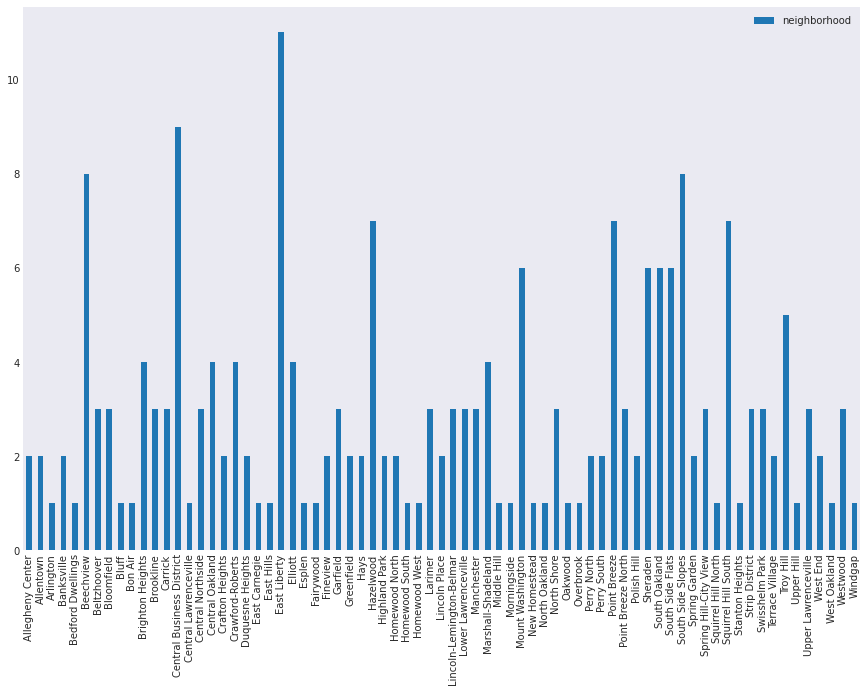

In [45]:
grph = parks["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90,figsize =(15,10),legend = True)

In [46]:
num_parks = parks.groupby("neighborhood").sum("acreage")

parks_map = neighborhoods.merge(num_parks, how='left', left_on='hood', right_on='neighborhood')

parks_map[['hood','acreage','geometry']].head()

,hood,acreage,geometry
0,Point Breeze North,11.258949,"POLYGON ((-79.90531 40.45549, -79.90488 40.455..."
1,Squirrel Hill North,2.207774,"POLYGON ((-79.92063 40.44423, -79.92052 40.443..."
2,Garfield,10.717064,"POLYGON ((-79.93546 40.47257, -79.93530 40.472..."
3,Bedford Dwellings,8.081632,"POLYGON ((-79.96601 40.45520, -79.96595 40.454..."
4,Knoxville,NaN,"POLYGON ((-79.98819 40.41852, -79.98824 40.418..."


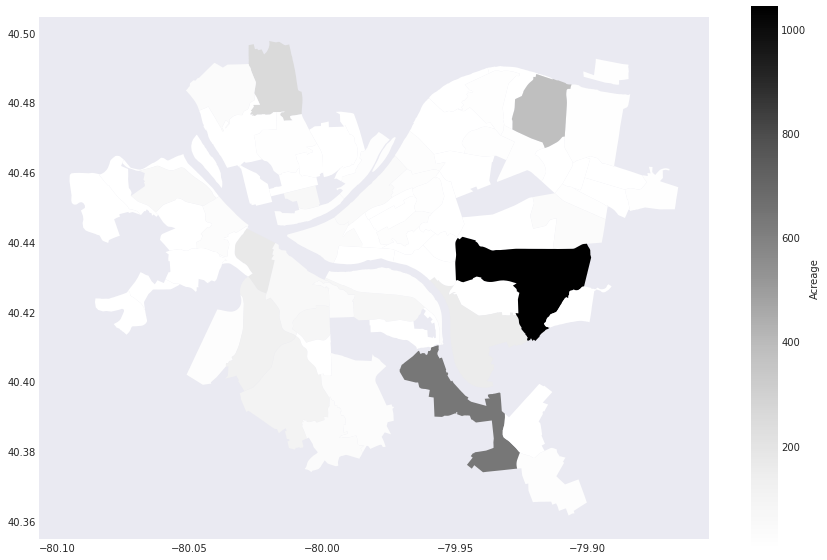

In [47]:
parks_map.plot(
    column='acreage',
    legend=True,              
    legend_kwds={'label': "Acreage"}, # label the legend
    figsize=(15, 10),
    )

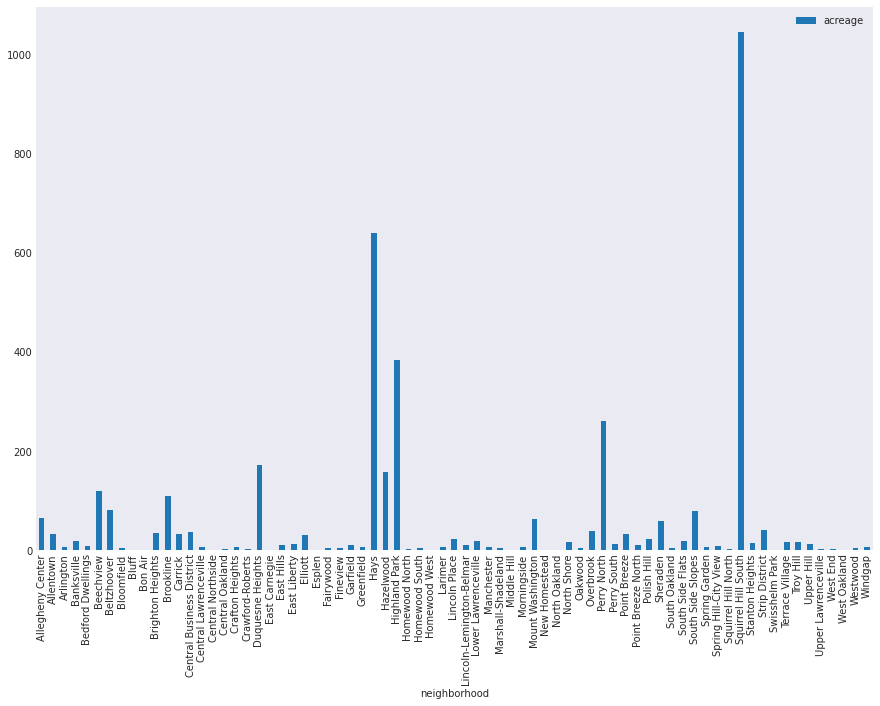

In [48]:
data = parks.groupby("neighborhood")['acreage'].sum().reset_index()
grph = data.plot(kind='bar', x='neighborhood', y='acreage', rot=90, figsize=(15, 10), legend=True)

#### ***Conclusion***

By square footage, Squirrel Hill South has the most acreage with of parks

After living here for 19 years, this make sense to me because it contains some of Frick and Schenley parks which are the two largest parks in Pittsburgh.